In [1]:
#The data was accessed from Kaggle ast https://www.kaggle.com/datasets/Cornell-University/arxiv
#and the 5 columns of interest were used to create a new dataset

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
#Read csv myscvfile
df = pd.read_csv('mycsvfile.csv',  dtype='unicode')


In [4]:
#Check first 10 entries
df.head(10)

,id,title,comments,journal-ref,categories
0,0704.0001,Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph
1,0704.0002,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,NaN,math.CO cs.CG
2,0704.0003,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",NaN,physics.gen-ph
3,0704.0004,A determinant of Stirling cycle numbers counts...,11 pages,NaN,math.CO
4,0704.0006,Bosonic characters of atomic Cooper pairs acro...,"6 pages, 4 figures, accepted by PRA",NaN,cond-mat.mes-hall
5,0704.0007,Polymer Quantum Mechanics and its Continuum Limit,"16 pages, no figures. Typos corrected to match...","Phys.Rev.D76:044016,2007",gr-qc
6,0704.0008,Numerical solution of shock and ramp compressi...,Minor corrections,"Journal of Applied Physics, vol 104, 073536 (2...",cond-mat.mtrl-sci
7,0704.0010,"Partial cubes: structures, characterizations, ...","36 pages, 17 figures",NaN,math.CO
8,0704.0011,Computing genus 2 Hilbert-Siegel modular forms...,14 pages; title changed; to appear in Experime...,NaN,math.NT math.AG
9,0704.0014,Iterated integral and the loop product,"18 pages, 1 figure",NaN,math.CA math.AT


In [5]:
# Check last 10 entries
df.tail(10)

,id,title,comments,journal-ref,categories
1726201,supr-con/9608003,Extended bound states and resonances of two fe...,"21 pages, RevTeX, 4 Postscript figures, arithm...","Phys. Rev. B 55, 6035 (1997)",supr-con cond-mat.supr-con
1726202,supr-con/9608004,Ginzburg-Landau-Gor'kov Theory of Magnetic osc...,"39 pages, 8 figures. This is a replacement of ...",PHYS REV B 56: (2) 809-825 JUL 1 1997,supr-con cond-mat.supr-con
1726203,supr-con/9608005,Evidence for Quasiparticle Decay in Photoemiss...,"4 pages of ReVTeX, 3 eps figures","Phys. Rev. Lett. 79, 1726 (1997)",supr-con cond-mat.supr-con
1726204,supr-con/9608006,Strong coupling theory of the interlayer tunne...,"23 pages, 7 Postscript figures, REVTeX 3.0 wit...",NaN,supr-con cond-mat.supr-con
1726205,supr-con/9608007,The Fluctuation Induced Pseudogap in the Infra...,"8 pages, 4 eps figures, Submitted to Phys. Rev. B",NaN,supr-con cond-mat.supr-con
1726206,supr-con/9608008,On the origin of the irreversibility line in t...,"19 pages, LaTex, 6 PostScript figures; Author'...",NaN,supr-con cond-mat.supr-con
1726207,supr-con/9609001,Nonlinear Response of HTSC Thin Film Microwave...,"4 pages, LaTeX type, Uses IEEE style files, 60...",NaN,supr-con cond-mat.supr-con
1726208,supr-con/9609002,Critical State Flux Penetration and Linear Mic...,"20 pages, LaTeX type, Uses REVTeX style files,...",NaN,supr-con cond-mat.supr-con
1726209,supr-con/9609003,Density of States and NMR Relaxation Rate in A...,"7 pages, 4 PostScript Figures, LaTeX, to appea...",NaN,supr-con cond-mat.supr-con
1726210,supr-con/9609004,Ginzburg Landau theory for d-wave pairing and ...,"12 pages including 8 eps figs, LaTeX with jpsj...","J. Phys. Soc. Jpn. 66, 204 (1997).",supr-con cond-mat.supr-con


In [6]:
#Information on dataset, number of rows, columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726211 entries, 0 to 1726210
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           object
 1   title        object
 2   comments     object
 3   journal-ref  object
 4   categories   object
dtypes: object(5)
memory usage: 65.8+ MB


In [7]:
#Dataset description 
df.describe(include='all')

,id,title,comments,journal-ref,categories
count,1726211,1726211,1726178,680809,1726211
unique,1726211,1722861,1063653,676223,63073
top,0704.0001,Discussion of: A statistical analysis of multi...,10 pages,"Dans Design, Automation and Test in Europe - D...",astro-ph
freq,1,12,7551,127,85695


In [8]:
#Check for null values, comments field should have no null values as theses should have been removed when the dataset was
#extracted from kaggle.
df.isnull().sum()

id                   0
title                0
comments            33
journal-ref    1045402
categories           0
dtype: int64

In [9]:
#Find rows with null data values
df[df['comments'].isna()]

,id,title,comments,journal-ref,categories
82050,0811.2543,A Non-Renormalized Field Theoretic Treatment o...,NaN,NaN,quant-ph
96428,0902.4400,The Relativistic Electrodynamics Least Action ...,NaN,NaN,math-ph math.MP
366713,1306.5516,Some Generalization of Hadamard's type Inequal...,NaN,"Indian Journal 0f Pure Applied Mathematics, 44...",math.FA math.CA
529770,1508.05368,Quaternion Generalization of Super Poincare Group,NaN,NaN,physics.gen-ph
734968,1801.04866,"An inverse problem for the relativistic Schr\""...",NaN,"Applicable Analysis, 2019",math.AP
839001,1902.02144,Progressive Generative Adversarial Networks fo...,NaN,NaN,cs.CV
849973,1903.07034,Reconstruction for the coefficients of a quasi...,NaN,Applied Mathematics Letters-2019,math.AP
884695,1907.06086,Skew Generalized Cyclic Code over $\n R[x_1;\...,NaN,NaN,cs.IT math.IT
896372,1908.09281,Quantum Brayton Engine of Non-Interacting Ferm...,NaN,NaN,cond-mat.stat-mech
982700,2006.01381,Identifying Fake Profiles in LinkedIn,NaN,NaN,cs.SI cs.CY cs.LG


In [10]:
#Drop rows with NaN in comments and check to see if they have been removed (original method did not remove the NaN values)
df = df[df['comments'].notna()]
df.isnull().sum()

id                   0
title                0
comments             0
journal-ref    1045374
categories           0
dtype: int64

In [11]:
#Check to see if None is present in the comments field
check_1 = df[df['comments'].str.contains('None')]
print(check_1)

Empty DataFrame
Columns: [id, title, comments, journal-ref, categories]
Index: []


In [12]:
#Check title for COVID, covid or Covid
check_2 = df[df['title'].str.contains('COVID|Covid|covid')]
print(check_2)

Empty DataFrame
Columns: [id, title, comments, journal-ref, categories]
Index: []


In [13]:
#Check duplicate rows title
duplicate = df[df.duplicated('title')]

duplicate.shape

(3350, 5)

In [14]:
duplicate.head(30)

,id,title,comments,journal-ref,categories
15821,0708.0098,Discussion of ``2004 IMS Medallion Lecture: Lo...,Published at http://dx.doi.org/10.1214/0090536...,"Annals of Statistics 2006, Vol. 34, No. 6, 267...",q-fin.RM math.ST stat.TH
15843,0708.0121,Discussion of ``2004 IMS Medallion Lecture: Lo...,Published at http://dx.doi.org/10.1214/0090536...,"Annals of Statistics 2006, Vol. 34, No. 6, 267...",q-fin.RM math.ST stat.TH
15846,0708.0124,Discussion of ``2004 IMS Medallion Lecture: Lo...,Published at http://dx.doi.org/10.1214/0090536...,"Annals of Statistics 2006, Vol. 34, No. 6, 268...",q-fin.RM math.ST stat.TH
15852,0708.0132,Discussion of ``2004 IMS Medallion Lecture: Lo...,Published at http://dx.doi.org/10.1214/0090536...,"Annals of Statistics 2006, Vol. 34, No. 6, 268...",q-fin.RM math.ST stat.TH
15984,0708.0287,Comment: Expert Elicitation for Reliable Syste...,Published at http://dx.doi.org/10.1214/0883423...,"Statistical Science 2006, Vol. 21, No. 4, 454-455",stat.ME
15985,0708.0288,Comment: Expert Elicitation for Reliable Syste...,Published at http://dx.doi.org/10.1214/0883423...,"Statistical Science 2006, Vol. 21, No. 4, 456-459",stat.ME
16030,0708.0336,Comment: Monitoring Networked Applications Wit...,Published at http://dx.doi.org/10.1214/0883423...,"Statistical Science 2006, Vol. 21, No. 4, 479-482",stat.ME
16032,0708.0338,Comment: Monitoring Networked Applications Wit...,Published at http://dx.doi.org/10.1214/0883423...,"Statistical Science 2006, Vol. 21, No. 4, 483-484",stat.ME
17854,0708.2385,A centimetre-wave excess over free-free emissi...,accepted for publication in MNRAS; corrected t...,NaN,astro-ph
19091,0708.3777,Comment: Fisher Lecture: Dimension Reduction i...,Published at http://dx.doi.org/10.1214/0883423...,"Statistical Science 2007, Vol. 22, No. 1, 32-35",stat.ME


In [15]:
# Check duplicates title, journal-ref, catagories
duplicate_ref = df[df.duplicated(['title', 'journal-ref', 'categories'])]

duplicate_ref.shape

(810, 5)

In [16]:
duplicate_ref.head(30)

,id,title,comments,journal-ref,categories
17854,0708.2385,A centimetre-wave excess over free-free emissi...,accepted for publication in MNRAS; corrected t...,NaN,astro-ph
23050,0709.3834,Back-in-time dynamics of the cluster IE 0657-5...,This is a duplicate of arXiv:0709.3572,NaN,astro-ph
26404,0710.2942,Rapidity gap survival in the black-disk regime,"9 pages, 4 figures, To appear in the proceedin...",NaN,hep-ph
33062,0711.4557,On Outage Behavior of Wideband Slow-Fading Cha...,Submitted to IEEE Transactions on Information ...,NaN,cs.IT math.IT
37294,0712.4391,The formation of spiral arms and rings in barr...,"9 pages, 4 figures, conference proceedings of ...",NaN,astro-ph
37642,0801.0366,The formation of spiral arms and rings in barr...,"6 pages, 3 figures, conference proceedings of ...",NaN,astro-ph
39864,0801.2933,Structure and Evolution of the Opacity of Spir...,"8 pages, 4 figures, to appear in the proceedin...",NaN,astro-ph
39869,0801.2938,Spitzer's View of Edge-on Spirals,"4 pages, 4 figures, to appear in the proceedin...",NaN,astro-ph
42923,0802.1543,Tidal Evolution of Close-in Extra-Solar Planets,"9 pages, 3 figures. To appear in the proceedin...",NaN,astro-ph
54746,0805.1442,How Many Users should be Turned On in a Multi-...,IEEE JSAC Special Issue on Exploiting Limited ...,NaN,cs.IT math.IT


In [17]:
# Check duplicates title, journal-ref, comments
duplicate_ref_com = df[df.duplicated(['title', 'journal-ref', 'comments'])]

duplicate_ref_com.shape

(29, 5)

In [18]:
duplicate_ref_com.head(30)

,id,title,comments,journal-ref,categories
135718,0911.2604,Precision Electroweak Measurements and Constra...,18 pages,NaN,hep-ex
146842,1001.4548,On the BICM Capacity,Submitted to the IEEE Transactions on Informat...,"IEEE Trans. Inform. Theory, vol. 57, no. 10, p...",cs.IT math.IT
147327,1001.5100,"On Exponential Sums, Nowton identities and Dic...",18 pages,NaN,cs.IT math.IT
153050,1003.1370,AKARI's infrared view on nearby stars : Using ...,"14 pages, 11 figures, accepted for publication...",NaN,astro-ph.SR
161313,1004.5254,D\'eveloppements asymptotiques combin\'es et p...,141 pages num\'erot\'ees par paires de 1 \`a 7...,NaN,math.DS
164220,1005.3192,"Associative Geometries. I: Torsors, linear rel...",v2: new results on relation with lattice theor...,NaN,math.RA
164221,1005.3193,"Associative Geometries. II: Involutions, the c...","V2: terminology changed (""torsor"" instead of ""...",NaN,math.RA
182970,1009.3141,Analysis of semidiscretization of the compress...,31 pages,NaN,math.CA
198425,1012.2367,Precision Electroweak Measurements and Constra...,18 pages,NaN,hep-ex
370771,1307.3655,"Photoionization Delay in He, Ne, Ar and Kr",This paper has been withdrawn by the author be...,NaN,physics.atom-ph


In [19]:
# Check duplicates title, journal-ref, comments
duplicate_all= df[df.duplicated(['title', 'journal-ref', 'comments', 'categories'])]

duplicate_all.shape

(16, 5)

In [20]:
duplicate_all

,id,title,comments,journal-ref,categories
135718,0911.2604,Precision Electroweak Measurements and Constra...,18 pages,NaN,hep-ex
146842,1001.4548,On the BICM Capacity,Submitted to the IEEE Transactions on Informat...,"IEEE Trans. Inform. Theory, vol. 57, no. 10, p...",cs.IT math.IT
147327,1001.5100,"On Exponential Sums, Nowton identities and Dic...",18 pages,NaN,cs.IT math.IT
153050,1003.1370,AKARI's infrared view on nearby stars : Using ...,"14 pages, 11 figures, accepted for publication...",NaN,astro-ph.SR
161313,1004.5254,D\'eveloppements asymptotiques combin\'es et p...,141 pages num\'erot\'ees par paires de 1 \`a 7...,NaN,math.DS
164220,1005.3192,"Associative Geometries. I: Torsors, linear rel...",v2: new results on relation with lattice theor...,NaN,math.RA
164221,1005.3193,"Associative Geometries. II: Involutions, the c...","V2: terminology changed (""torsor"" instead of ""...",NaN,math.RA
182970,1009.3141,Analysis of semidiscretization of the compress...,31 pages,NaN,math.CA
198425,1012.2367,Precision Electroweak Measurements and Constra...,18 pages,NaN,hep-ex
370771,1307.3655,"Photoionization Delay in He, Ne, Ar and Kr",This paper has been withdrawn by the author be...,NaN,physics.atom-ph


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726178 entries, 0 to 1726210
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           object
 1   title        object
 2   comments     object
 3   journal-ref  object
 4   categories   object
dtypes: object(5)
memory usage: 79.0+ MB


In [22]:
df = df.drop_duplicates('title', keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722828 entries, 0 to 1726210
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           object
 1   title        object
 2   comments     object
 3   journal-ref  object
 4   categories   object
dtypes: object(5)
memory usage: 78.9+ MB


In [23]:
#set sns styles
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [24]:
#create copy dataset to calculate the length of the 5 fields for plotting
data_lengths = df[['id', 'title', 'comments', 'journal-ref', 'categories']].copy()
data_lengths.head()

,id,title,comments,journal-ref,categories
0,0704.0001,Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph
1,0704.0002,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,NaN,math.CO cs.CG
2,0704.0003,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",NaN,physics.gen-ph
3,0704.0004,A determinant of Stirling cycle numbers counts...,11 pages,NaN,math.CO
4,0704.0006,Bosonic characters of atomic Cooper pairs acro...,"6 pages, 4 figures, accepted by PRA",NaN,cond-mat.mes-hall


In [25]:
#Calculate the length of the fields
data_lengths['id_len'] = data_lengths['id'].str.len()
data_lengths['title_len'] = data_lengths['title'].str.len()
data_lengths['comments_len'] = data_lengths['comments'].str.len()
data_lengths['journal-ref_len'] = data_lengths['journal-ref'].str.len()
data_lengths['categories_len'] = data_lengths['categories'].str.len()
data_lengths.head()

,id,title,comments,journal-ref,categories,id_len,title_len,comments_len,journal-ref_len,categories_len
0,0704.0001,Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,9,87,39,24.0,6
1,0704.0002,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,NaN,math.CO cs.CG,9,40,37,NaN,13
2,0704.0003,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",NaN,physics.gen-ph,9,83,19,NaN,14
3,0704.0004,A determinant of Stirling cycle numbers counts...,11 pages,NaN,math.CO,9,89,8,NaN,7
4,0704.0006,Bosonic characters of atomic Cooper pairs acro...,"6 pages, 4 figures, accepted by PRA",NaN,cond-mat.mes-hall,9,58,35,NaN,17


<AxesSubplot:xlabel='Count', ylabel='id_len'>

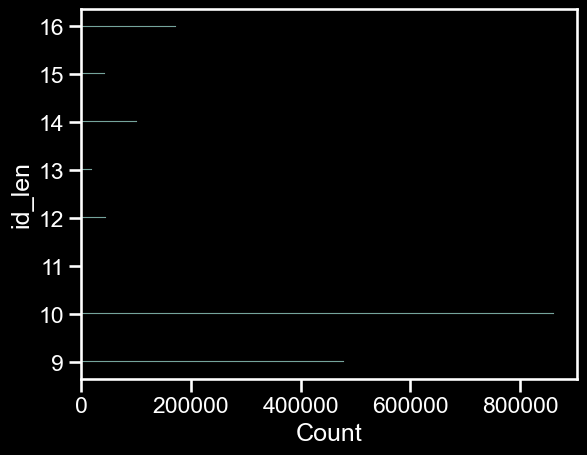

In [26]:
#Plot histogram of id length
sns.histplot(data=data_lengths, y='id_len', legend=False)


<AxesSubplot:xlabel='id_len', ylabel='count'>

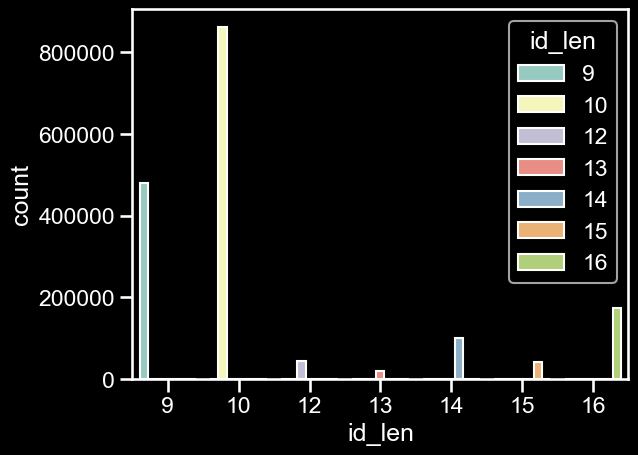

In [27]:
#countplot id_len
sns.countplot(x ='id_len', hue ='id_len', data = data_lengths)

<AxesSubplot:xlabel='Count', ylabel='title_len'>

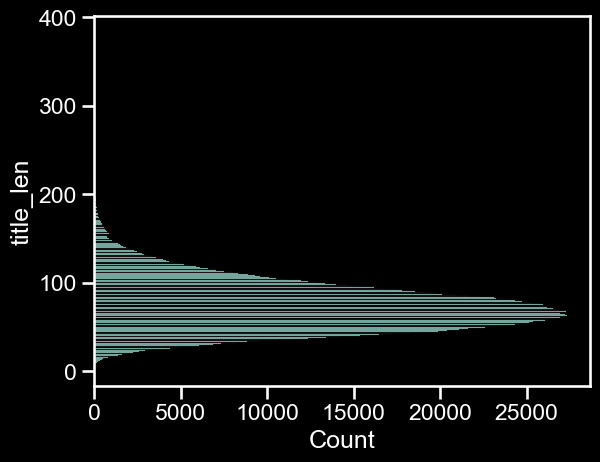

In [28]:
#Plot histogram of id length
sns.histplot(data=data_lengths, y='title_len', legend=False)


<AxesSubplot:xlabel='comments_len', ylabel='journal-ref_len'>

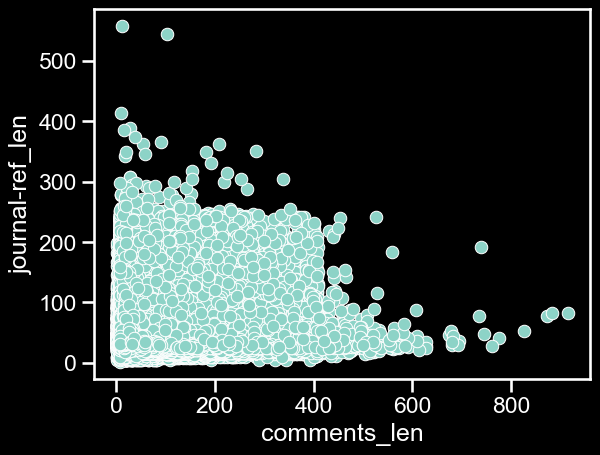

In [29]:
sns.scatterplot(x='comments_len', y='journal-ref_len', data=data_lengths)

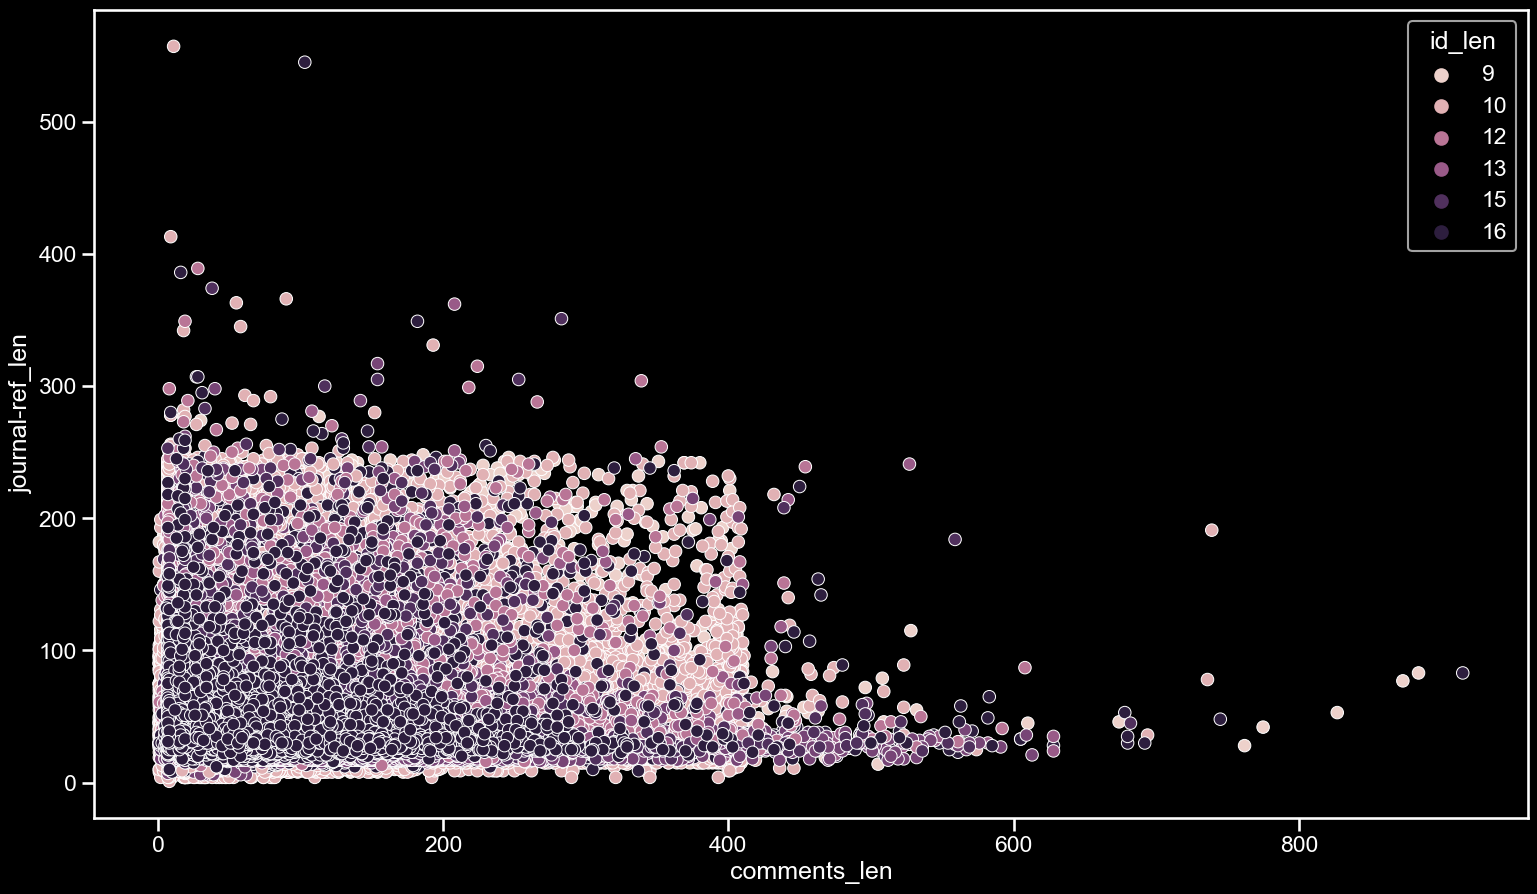

In [30]:
g=sns.scatterplot(data=data_lengths, x='comments_len', y='journal-ref_len', hue='id_len')
g.figure.set_size_inches(18.5, 10.5)

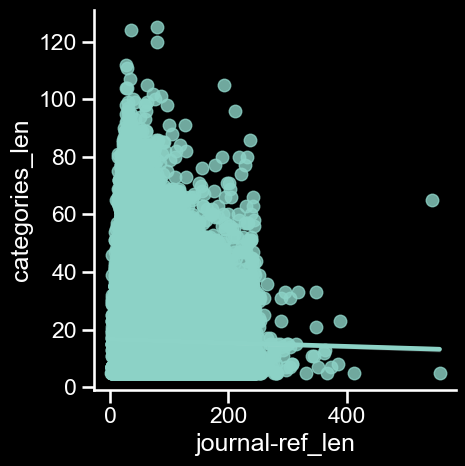

In [31]:
sns.lmplot(data=data_lengths, x ='journal-ref_len', y ='categories_len')

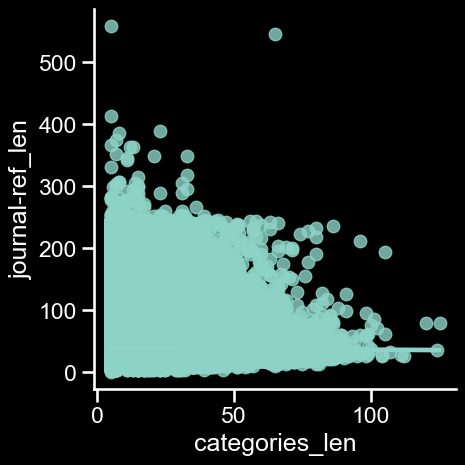

In [32]:
sns.lmplot(data=data_lengths, x ='categories_len', y ='journal-ref_len')

In [33]:
#Drop rows with NaN in journal-ref
data_lengths = data_lengths[data_lengths['journal-ref'].notna()]

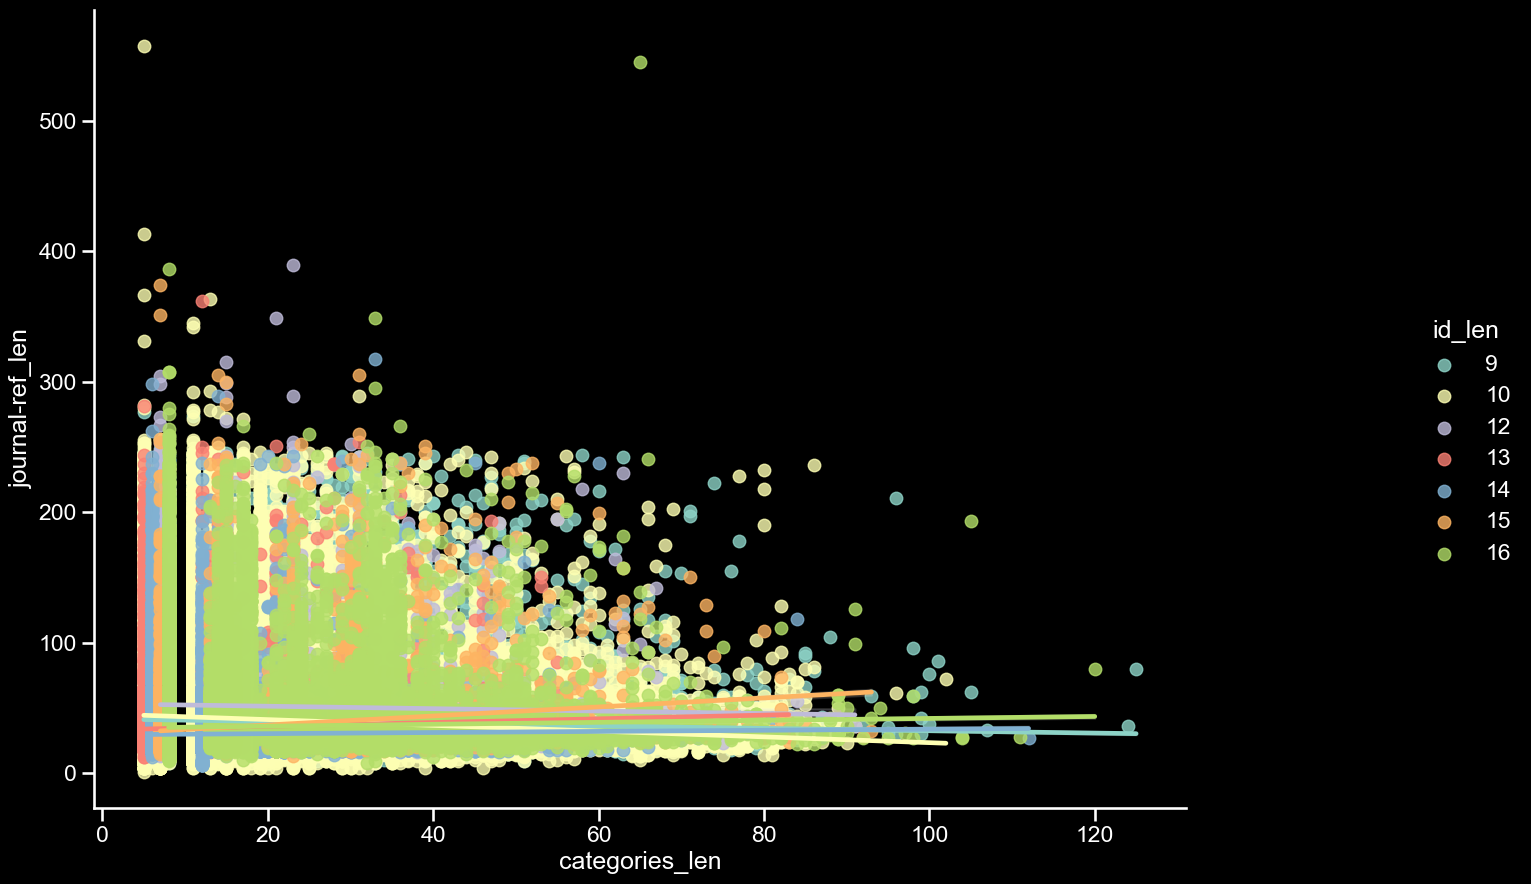

In [34]:
g=sns.lmplot(data=data_lengths, x ='categories_len', y ='journal-ref_len', hue='id_len')
g.figure.set_size_inches(18.5, 10.5)

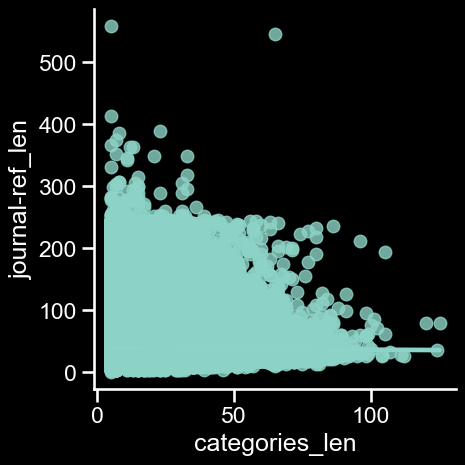

In [35]:
sns.lmplot(data=data_lengths, x ='categories_len', y ='journal-ref_len')

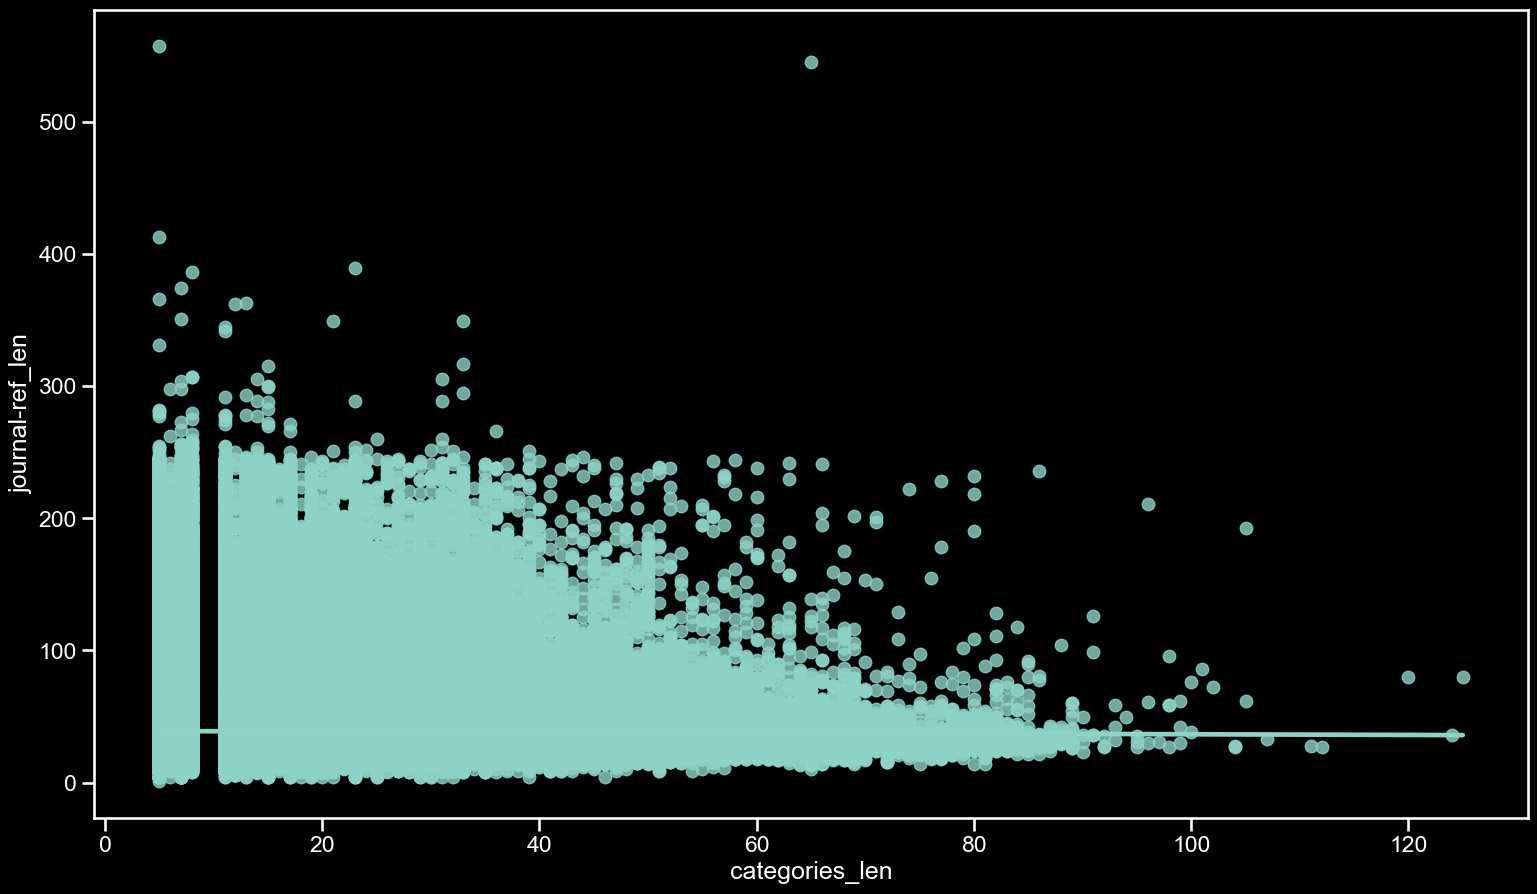

In [36]:
g=sns.regplot(data=data_lengths, x ='categories_len', y ='journal-ref_len')
g.figure.set_size_inches(18.5, 10.5)

In [37]:
#create new dataset to calculate most common word in title
title = df[['id', 'title', 'journal-ref']].copy()
title.head()

,id,title,journal-ref
0,0704.0001,Calculation of prompt diphoton production cros...,"Phys.Rev.D76:013009,2007"
1,0704.0002,Sparsity-certifying Graph Decompositions,NaN
2,0704.0003,The evolution of the Earth-Moon system based o...,NaN
3,0704.0004,A determinant of Stirling cycle numbers counts...,NaN
4,0704.0006,Bosonic characters of atomic Cooper pairs acro...,NaN


In [38]:
#transform data so that all text in title is in lowercase
title['title'] = title['title'].astype(str).str.lower()
title.head(3)

,id,title,journal-ref
0,0704.0001,calculation of prompt diphoton production cros...,"Phys.Rev.D76:013009,2007"
1,0704.0002,sparsity-certifying graph decompositions,NaN
2,0704.0003,the evolution of the earth-moon system based o...,NaN


In [39]:
#Tokenize to split individual words
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

title['text_token']=title['title'].apply(regexp.tokenize)
title.head(3)

,id,title,journal-ref,text_token
0,0704.0001,calculation of prompt diphoton production cros...,"Phys.Rev.D76:013009,2007","[calculation, of, prompt, diphoton, production..."
1,0704.0002,sparsity-certifying graph decompositions,NaN,"[sparsity, certifying, graph, decompositions]"
2,0704.0003,the evolution of the earth-moon system based o...,NaN,"[the, evolution, of, the, earth, moon, system,..."


In [40]:
#Create list English stopwords
stopwords = nltk.corpus.stopwords.words("english")
title['text_token'] = title['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
title.head(3)

,id,title,journal-ref,text_token
0,0704.0001,calculation of prompt diphoton production cros...,"Phys.Rev.D76:013009,2007","[calculation, prompt, diphoton, production, cr..."
1,0704.0002,sparsity-certifying graph decompositions,NaN,"[sparsity, certifying, graph, decompositions]"
2,0704.0003,the evolution of the earth-moon system based o...,NaN,"[evolution, earth, moon, system, based, dark, ..."


In [41]:
#Change the format of text_token to strings and keep only words which are longer than 3 letters
title['text_string'] = title['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))
title.head()

,id,title,journal-ref,text_token,text_string
0,0704.0001,calculation of prompt diphoton production cros...,"Phys.Rev.D76:013009,2007","[calculation, prompt, diphoton, production, cr...",calculation prompt diphoton production cross s...
1,0704.0002,sparsity-certifying graph decompositions,NaN,"[sparsity, certifying, graph, decompositions]",sparsity certifying graph decompositions
2,0704.0003,the evolution of the earth-moon system based o...,NaN,"[evolution, earth, moon, system, based, dark, ...",evolution earth moon system based dark matter ...
3,0704.0004,a determinant of stirling cycle numbers counts...,NaN,"[determinant, stirling, cycle, numbers, counts...",determinant stirling cycle numbers counts unla...
4,0704.0006,bosonic characters of atomic cooper pairs acro...,NaN,"[bosonic, characters, atomic, cooper, pairs, a...",bosonic characters atomic cooper pairs across ...


In [42]:
#Create a list of all words
all_words = ' '.join([word for word in title['text_string']])
#Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)
#Freq distribution all words
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'quantum': 101663, 'model': 78349, 'theory': 55501, 'using': 50786, 'field': 47952, 'based': 47631, 'systems': 46953, 'learning': 46112, 'spin': 43343, 'models': 40674, ...})

In [43]:
#Add to table dropping words that only appear 100 times or more
title['text_string_fdist'] = title['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 100 ]))
title.head()

,id,title,journal-ref,text_token,text_string,text_string_fdist
0,0704.0001,calculation of prompt diphoton production cros...,"Phys.Rev.D76:013009,2007","[calculation, prompt, diphoton, production, cr...",calculation prompt diphoton production cross s...,calculation prompt diphoton production cross s...
1,0704.0002,sparsity-certifying graph decompositions,NaN,"[sparsity, certifying, graph, decompositions]",sparsity certifying graph decompositions,sparsity certifying graph decompositions
2,0704.0003,the evolution of the earth-moon system based o...,NaN,"[evolution, earth, moon, system, based, dark, ...",evolution earth moon system based dark matter ...,evolution earth moon system based dark matter ...
3,0704.0004,a determinant of stirling cycle numbers counts...,NaN,"[determinant, stirling, cycle, numbers, counts...",determinant stirling cycle numbers counts unla...,determinant stirling cycle numbers counts unla...
4,0704.0006,bosonic characters of atomic cooper pairs acro...,NaN,"[bosonic, characters, atomic, cooper, pairs, a...",bosonic characters atomic cooper pairs across ...,bosonic characters atomic cooper pairs across ...


In [44]:
#Lemmatization to identify similar words
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()
title['text_string_lem'] = title['text_string_fdist'].apply(wordnet_lem.lemmatize)
#There may be no words to lemmatize
title['is_equal']= (title['text_string_fdist']==title['text_string_lem'])
# show level count
title.is_equal.value_counts()

True     1719753
False       3075
Name: is_equal, dtype: int64

In [45]:
#Frequency Distribution
all_words_lem = ' '.join([word for word in title['text_string_lem']])
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)
#Top 10 
fd.most_common(10)

[('quantum', 101664),
 ('model', 78372),
 ('theory', 55512),
 ('using', 50786),
 ('field', 47962),
 ('based', 47631),
 ('systems', 46930),
 ('learning', 46112),
 ('spin', 43343),
 ('models', 40651)]

<AxesSubplot:>

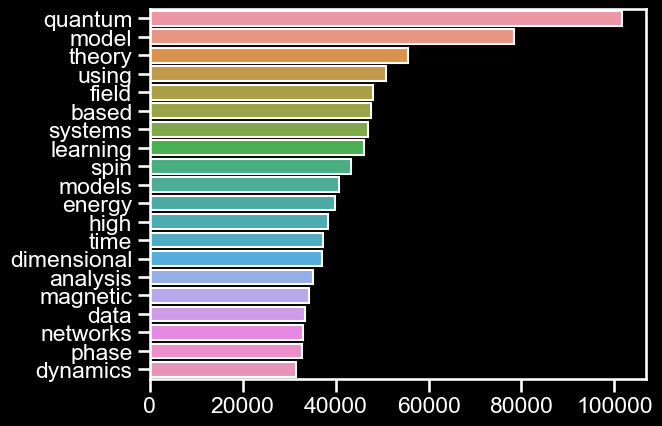

In [46]:
#plot graph top 20 most common words
top_20 = fd.most_common(20)
fdist = pd.Series(dict(top_20))
sns.barplot(y=fdist.index, x=fdist.values)

In [47]:
#Create data frame for titles that include quantum
quan = df[df['title'].str.contains('quantum|Quantum')]
quan.head()

,id,title,comments,journal-ref,categories
5,0704.0007,Polymer Quantum Mechanics and its Continuum Limit,"16 pages, no figures. Typos corrected to match...","Phys.Rev.D76:044016,2007",gr-qc
28,0704.0034,Origin of adaptive mutants: a quantum measurem...,5 pages,NaN,q-bio.PE q-bio.CB quant-ph
35,0704.0041,Quantum Group of Isometries in Classical and N...,improvements: (i) more general approach throug...,NaN,math.QA math-ph math.MP
36,0704.0042,"General System theory, Like-Quantum Semantics ...","12 pages,3 figures",NaN,physics.gen-ph quant-ph
46,0704.0052,Quantum Field Theory on Curved Backgrounds. II...,"18 pages, 1 figure",NaN,hep-th


In [48]:
#Find the 10 most common journal refs in model
quan['journal-ref'].value_counts().nlargest(10)

Commun. Math. Phys. (2022)                                                                                                                   4
In "Quantum Error Correction", edited by Daniel A. Lidar and Todd\n  A. Brun, (Cambridge University Press, 2013)                             3
Prog Theor Exp Phys (2018)                                                                                                                   3
in: A. V. Stoyanovsky, Introduction to the mathematical principles\n  of quantum field theory, Editorial URSS, Moscow, 2007 (in Russian).    3
Prog Theor Exp Phys (2020)                                                                                                                   3
Phys. Rev. A 93, 052105 (2016)                                                                                                               3
Nature Physics (2018)                                                                                                                        3

In [49]:
#Create data frame for titles that include model and find top 10 references
model = df[df['title'].str.contains('model|Model')]
model['journal-ref'].value_counts().nlargest(10)

Dans Design, Automation and Test in Europe - DATE'05, Munich :\n  Allemagne (2005)                                               18
Prog Theor Exp Phys (2020)                                                                                                       12
Prog Theor Exp Phys (2022)                                                                                                       11
Prog Theor Exp Phys (2018)                                                                                                       10
Prog Theor Exp Phys (2019)                                                                                                        9
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/MOEMS - DTIP 2008, Nice : France (2008)                      9
Prog Theor Exp Phys (2021)                                                                                                        8
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/MOEMS -

In [50]:
#Create data frame for titles that include theory and find top 10 references
theory = df[df['title'].str.contains('theory|Theory')]
theory['journal-ref'].value_counts().nlargest(10)

Prog Theor Exp Phys (2018)                                                                                                                   7
Prog Theor Exp Phys (2022)                                                                                                                   6
Prog Theor Exp Phys (2019)                                                                                                                   4
Prog Theor Exp Phys (2017)                                                                                                                   4
in: A. V. Stoyanovsky, Introduction to the mathematical principles\n  of quantum field theory, Editorial URSS, Moscow, 2007 (in Russian).    3
Prog Theor Exp Phys (2020)                                                                                                                   3
Nucl.Phys.B438:182-210,1995; Addendum-ibid.B449:146-148,1995                                                                                 2

In [51]:
#Create data frame for titles that include using and find top 10 references
using = df[df['title'].str.contains('using|Using')]
using['journal-ref'].value_counts().nlargest(10)

Dans Design, Automation and Test in Europe - DATE'05, Munich :\n  Allemagne (2005)                                               14
IJCSI, Volume 7, Issue 2, March 2010                                                                                              6
Journal of Computing, Vol. 2, No. 6, June 2010, NY, USA, ISSN\n  2151-9617                                                        6
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/MOEMS - DTIP 2006, Stresa, Lago Maggiore : Italie (2006)     6
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/MOEMS - DTIP 2008, Nice : France (2008)                      6
International Journal of Computer Science and Information\n  Security, IJCSIS, Vol. 4, No. 1 & 2, August 2009, USA                5
2019                                                                                                                              4
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/MOEMS -

In [52]:
#Create data frame for titles that include field and find top 10 references
field = df[df['title'].str.contains('field|Field')]
field['journal-ref'].value_counts().nlargest(10)

Prog Theor Exp Phys (2018)                                                                                                                   7
Prog Theor Exp Phys (2019)                                                                                                                   6
in: A. V. Stoyanovsky, Introduction to the mathematical principles\n  of quantum field theory, Editorial URSS, Moscow, 2007 (in Russian).    4
Prog Theor Exp Phys (2020)                                                                                                                   4
Prog Theor Exp Phys (2017)                                                                                                                   4
Phys. Rev. B 83, 144414 (2011)                                                                                                               2
Int.J.Mod.Phys.D15:2223-2228,2006                                                                                                            2

In [53]:
#Create data frame for titles that include based and find top 10 references
based = df[df['title'].str.contains('based|Based')]
based['journal-ref'].value_counts().nlargest(10)

Dans Design, Automation and Test in Europe - DATE'05, Munich :\n  Allemagne (2005)                                               17
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/MOEMS - DTIP 2008, Nice : France (2008)                     12
Dans Design, Automation and Test in Europe | Designers'Forum -\n  DATE'05, Munich : Allemagne (2005)                              7
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/MOEMS - DTIP 2006, Stresa, Lago Maggiore : Italie (2006)     7
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/MOEMS - DTIP 2007, Stresa, lago Maggiore : Italie (2007)     7
Journal of Computing, Vol. 2, No. 6, June 2010, NY, USA, ISSN\n  2151-9617                                                        6
IJCSIS June 2009 Issue, Vol. 2, No. 1                                                                                             5
IJCSI, Volume 7, Issue 2, March 2010                                        

In [54]:
#Create data frame for titles that include systems and find top 10 references
systems = df[df['title'].str.contains('systems|Systems')]
systems['journal-ref'].value_counts().nlargest(10)

Dans Design, Automation and Test in Europe - DATE'05, Munich :\n  Allemagne (2005)                                               12
Dans Design, Automation and Test in Europe | Designers'Forum -\n  DATE'05, Munich : Allemagne (2005)                              6
Phys.Rev. C65 (2002) 045501                                                                                                       3
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/MOEMS - DTIP 2007, Stresa, lago Maggiore : Italie (2007)     3
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/MOEMS - DTIP 2008, Nice : France (2008)                      3
SIAM J. Sci. Comput. 36(5): A2248-A2271, 2014                                                                                     2
IEEE Communications Letters 2021                                                                                                  2
Phys. Rev. E 100, 012134 (2019)                                             

In [55]:
#Create data frame for titles that include learning and find top 10 references
learning = df[df['title'].str.contains('learning|Learning')]
learning['journal-ref'].value_counts().nlargest(10)

ICLR 2022                                                                                                    6
AAAI 2022                                                                                                    6
ECCV 2022                                                                                                    5
ICLR 2023                                                                                                    4
NeurIPS 2021                                                                                                 4
Transactions on Machine Learning Research, 2022                                                              4
2020 42nd Annual International Conference of the IEEE Engineering\n  in Medicine & Biology Society (EMBC)    4
IEEE Transactions on Pattern Analysis and Machine Intelligence,\n  2022                                      4
Advances in Neural Information Processing Systems, 2021                                                      3
N

In [56]:
#Create data frame for titles that include spin and find top 10 references
spin = df[df['title'].str.contains('spin|Spin')]
spin['journal-ref'].value_counts().nlargest(10)

Prog Theor Exp Phys (2019)                3
Nature Physics 3, 780 (2007)              2
Phys. Rev. B 80, 024420 (2009)            2
J. Math. Anal. Appl. (2020)               2
Phys. Rev. B 91, 155103 (2015)            2
Nano Letters (2018)                       2
Nano Lett., 2009, 9 (12), pp 4204-4208    2
Phys. Rev. Research 2, 013099 (2020)      2
Phys. Rev. Lett. 110, 246403 (2013)       2
Phys. Rev. B 72, 184401 (2005)            2
Name: journal-ref, dtype: int64

In [57]:
#Create data frame for titles that include models and find top 10 references
models = df[df['title'].str.contains('models|Models')]
models['journal-ref'].value_counts().nlargest(10)

Prog Theor Exp Phys (2022)                                                                                      6
ICLR 2023                                                                                                       4
In Proceedings of the Fifth Workshop on Constraint Based Methods\n  for Bioinformatics (WCB09), 2009, Lisbon    2
Lett.Math.Phys.84:257-273,2008                                                                                  2
JHEP 1102 (2011) 038                                                                                            2
Statistical Papers 2020                                                                                         2
EMNLP 2018                                                                                                      2
Phys. Rev. A 97, 052119 (2018)                                                                                  2
CIKM 2020                                                                               

In [58]:
# Redo model search with space after model to compare the resutls with original model search
model2 = df[df['title'].str.contains('model |Model ')]
model2['journal-ref'].value_counts().nlargest(10)


Prog Theor Exp Phys (2020)                                                                                                       6
Dans Design, Automation and Test in Europe - DATE'05, Munich :\n  Allemagne (2005)                                               6
Prog Theor Exp Phys (2021)                                                                                                       5
Prog Theor Exp Phys (2022)                                                                                                       4
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/MOEMS - DTIP 2006, Stresa, Lago Maggiore : Italie (2006)    3
Prog Theor Exp Phys (2019)                                                                                                       3
Prog Theor Exp Phys (2018)                                                                                                       3
Prog Theor Exp Phys (2017)                                                         

In [59]:
model2['journal-ref'].isnull().sum()

25591

In [60]:
quan['journal-ref'].isnull().sum()

40796

In [61]:
theory['journal-ref'].isnull().sum()

27010

In [62]:
using['journal-ref'].isnull().sum()

36356

In [63]:
field['journal-ref'].isnull().sum()

34341

In [64]:
based['journal-ref'].isnull().sum()

35447

In [65]:
systems['journal-ref'].isnull().sum()

28999

In [66]:
learning['journal-ref'].isnull().sum()

39614

In [67]:
spin['journal-ref'].isnull().sum()

18574

In [68]:
models['journal-ref'].isnull().sum()

23828